<h2 style='color:blue' align="center">Decision Tree Classification</h2>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("salaries.csv")
df.head()

In [ ]:
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
company_le = LabelEncoder()
job_le = LabelEncoder()
degree_le = LabelEncoder()

In [ ]:
df['company_n'] = company_le.fit_transform(df['company'])
df['job_no'] = job_le.fit_transform(df['job'])
df['degree_no'] = degree_le.fit_transform(df['degree'])
df

In [ ]:
x = df.drop(['company', 'job', 'degree', 'salary_more_then_100k'], axis='columns')
x

In [ ]:
y=df['salary_more_then_100k']
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=50)

In [ ]:
x_test, y_test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

In [ ]:
DTC.score(x_test,y_test), DTC.predict(x_test)

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [ ]:
DTC.predict([[2,1,0]])

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [ ]:
DTC.predict([[2,1,1]])

**Exercise: Build decision tree model to predict survival based on certain parameters**

<img src="titanic.jpg" height=200 width=400/>

In [53]:
import pandas as pd
df = pd.read_csv(r'H:\ML&DL\ML Project 01\Instant\ML\9_decision_tree\Exercise\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
 None)

In [77]:
df['Parch'].unique(), df[df.Parch == 0].count()

(array([0, 1, 2, 5, 3, 4, 6], dtype=int64),
 PassengerId    678
 Survived       678
 Pclass         678
 Name           678
 Sex            678
 Age            521
 SibSp          678
 Parch          678
 Ticket         678
 Fare           678
 Cabin          141
 Embarked       676
 dtype: int64)

In [86]:
df['SibSp'].unique(), df[df['SibSp'] == 8].count()

(array([1, 0, 3, 4, 2, 5, 8], dtype=int64),
 PassengerId    7
 Survived       7
 Pclass         7
 Name           7
 Sex            7
 Age            0
 SibSp          7
 Parch          7
 Ticket         7
 Fare           7
 Cabin          0
 Embarked       7
 dtype: int64)

Text(0.5, 1.0, 'Fare')

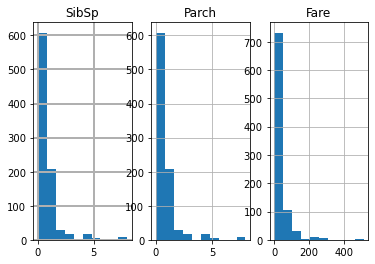

In [87]:
from matplotlib import pyplot as plt
df['SibSp'].unique(),
plt.subplot(1,3,1); plt.title('SibSp'); plt.hist(df['SibSp']); plt.grid(linewidth = 2),

df['Parch'].unique(),
plt.subplot(1,3,2); plt.title('Parch'), plt.hist(df['SibSp']); plt.grid()

df['Fare'].unique(),
plt.subplot(1,3,3); plt.grid(); plt.hist(df['Fare']); plt.title('Fare')

In [ ]:
import pandas as pd
dummies = pd.get_dummies(df.Cabin, drop_first=True)
merge=pd.concat([df,dummies], axis='columns')
penultimate_df = merge.drop(['PassengerId','Name', 'Ticket','Cabin'], axis = 'columns')
penultimate_df

In [ ]:
from sklearn.preprocessing import LabelEncoder
sex_le = LabelEncoder()
Embarked_le = LabelEncoder()

In [ ]:
penultimate_df['Sex_ID'] = sex_le.fit_transform(penultimate_df['Sex'])
penultimate_df

In [ ]:
df.loc[:, ['Age']] = df.loc[:, ['Age']].fillna(df['Age'].mean())
df

CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv

##### In this file using following columns build a model to predict if person would survive or not,

1. Pclass
1. Sex
1. Age
1. Fare

##### Calculate score of your model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'H:\ML&DL\ML Project 01\Instant\ML\9_decision_tree\Exercise\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns')
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [4]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


(None,
          Survived      Pclass         Age        Fare
 count  891.000000  891.000000  714.000000  891.000000
 mean     0.383838    2.308642   29.699118   32.204208
 std      0.486592    0.836071   14.526497   49.693429
 min      0.000000    1.000000    0.420000    0.000000
 25%      0.000000    2.000000   20.125000    7.910400
 50%      0.000000    3.000000   28.000000   14.454200
 75%      1.000000    3.000000   38.000000   31.000000
 max      1.000000    3.000000   80.000000  512.329200)

In [5]:
df.loc[:,['Age']] = df.loc[:, ['Age']].fillna(df['Age'].median())
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,28.0,23.4500
889,1,1,male,26.0,30.0000


In [6]:
sex_le = LabelEncoder()
df['sex_id'] = sex_le.fit_transform(df['Sex'])

,Survived,Pclass,Sex,Age,Fare,sex_id
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,28.0,23.4500,0
889,1,1,male,26.0,30.0000,1


In [7]:
x = df.drop(['Survived','Sex'], axis = 'columns')
x

,Pclass,Age,Fare,sex_id
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


In [8]:
y = df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [46]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 72)

DTC.fit(x_train, y_train)
DTC.score(x_test, y_test)

0.8324022346368715

In [47]:
y_pred = DTC.predict(x_test)
y_pred, y_test

(array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1], dtype=int64),
 9      1
 450    0
 306    1
 179    0
 346    1
       ..
 827    1
 755    1
 849    1
 101    0
 801    1
 Name: Survived, Length: 179, dtype: int64)

In [49]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, y_pred)
con

array([[88, 19],
       [11, 61]], dtype=int64)

Text(6.0, 0.5, 'Predicted')

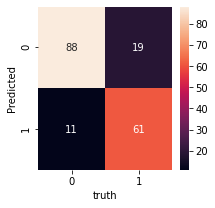

In [52]:
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(con, annot = True)
plt.xlabel('truth')
plt.ylabel('Predicted')